# Calculating calibration densities and plotting models
- This workbook shows how we calculate densities for calibration data, plot models and calculate the cali lines

In [1]:
# Import useful python packages
import pandas as pd
import os
import DiadFit as pf
pf.__version__

'0.0.87'

## Plot of density vs fermi splitting

In [2]:
cornellpath=os.getcwd()+'/'+"CMASS_cali_data.xlsx"
cornellcell=pd.read_excel(cornellpath,sheet_name="April_Used2FitEG_Eqs") # This is the data originally used to fit the equations for CMASS (only april 2021)
apraugdat=pd.read_excel(cornellpath,sheet_name="APR 2021 +AUG21") # This cali dataset includes both april and august 2021.
display(cornellcell.head())

c:\Users\penny\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Date,time,Raw file name,Sample,v- position (cm-1),v+ position (cm-1),corr v-,corr v+,∆CO2 (cm-1),Ne corrected ∆CO2 (cm-1),...,∆Ne-m (cm-1),∆Ne-r (cm-1),1116 r (cm-1),1446.5 r (cm-1),m,b,laser power,int x acc,approx max counts,Unnamed: 28
0,2021-04-20,14:56:32,FDCA01X1,FDCA01,1279.658597,1384.534514,1280.266389,1385.209445,104.875917,104.943056,...,330.266206,330.477635,1115.991927,1446.469562,1.000640,-0.211417,54 mW,10s x 3,50000,NaN
1,2021-04-20,15:00:18,FDCA01X2,FDCA01,1279.662216,1384.533940,1280.273228,1385.208244,104.871724,104.935016,...,330.278306,330.477635,1115.991927,1446.469562,1.000604,-0.161288,54 mW,10s x 3,50000,NaN
2,2021-04-20,15:04:15,FDCA01X3,FDCA01,1279.656182,1384.534258,1280.271344,1385.214356,104.878076,104.943013,...,330.273142,330.477635,1115.991927,1446.469562,1.000619,-0.177154,54 mW,10s x 3,50000,NaN
3,2021-04-20,15:15:56,FDCA02X1,FDCA02,1279.748089,1384.568105,1280.364694,1385.246217,104.820016,104.881523,...,330.283828,330.477635,1115.991927,1446.469562,1.000587,-0.134338,54 mW,10s x 3,50000,NaN
4,2021-04-20,15:22:06,FDCA02X2,FDCA02,1279.748730,1384.569705,1280.361785,1385.246675,104.820975,104.884890,...,330.276249,330.477635,1115.991927,1446.469562,1.000610,-0.167272,54 mW,10s x 3,50000,NaN


# Fit the calibration lines 
- Separate sets by temperature

In [3]:
T37C=cornellcell[cornellcell['T (ID)']==24.77]
T37C_withaug=apraugdat[apraugdat['T (ID)']==24.77]

Split_col='Ne corrected ∆CO2  (cm-1)'
CO2_dens_col='Density from EOS  (g/ml)'
split_error=0.01
CO2_dens_error=0.01


In [4]:
cornellcell

,Date,time,Raw file name,Sample,v- position (cm-1),v+ position (cm-1),corr v-,corr v+,∆CO2 (cm-1),Ne corrected ∆CO2 (cm-1),...,∆Ne-m (cm-1),∆Ne-r (cm-1),1116 r (cm-1),1446.5 r (cm-1),m,b,laser power,int x acc,approx max counts,Unnamed: 28
0,2021-04-20,14:56:32,FDCA01X1,FDCA01,1279.658597,1384.534514,1280.266389,1385.209445,104.875917,104.943056,...,330.266206,330.477635,1115.991927,1446.469562,1.000640,-0.211417,54 mW,10s x 3,50000,NaN
1,2021-04-20,15:00:18,FDCA01X2,FDCA01,1279.662216,1384.533940,1280.273228,1385.208244,104.871724,104.935016,...,330.278306,330.477635,1115.991927,1446.469562,1.000604,-0.161288,54 mW,10s x 3,50000,NaN
2,2021-04-20,15:04:15,FDCA01X3,FDCA01,1279.656182,1384.534258,1280.271344,1385.214356,104.878076,104.943013,...,330.273142,330.477635,1115.991927,1446.469562,1.000619,-0.177154,54 mW,10s x 3,50000,NaN
3,2021-04-20,15:15:56,FDCA02X1,FDCA02,1279.748089,1384.568105,1280.364694,1385.246217,104.820016,104.881523,...,330.283828,330.477635,1115.991927,1446.469562,1.000587,-0.134338,54 mW,10s x 3,50000,NaN
4,2021-04-20,15:22:06,FDCA02X2,FDCA02,1279.748730,1384.569705,1280.361785,1385.246675,104.820975,104.884890,...,330.276249,330.477635,1115.991927,1446.469562,1.000610,-0.167272,54 mW,10s x 3,50000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2021-04-21,20:32:14,FDCA37X1,FDCA37,1284.320666,1387.015614,1284.913079,1387.675879,102.694948,102.762800,...,330.259428,330.477635,1115.991927,1446.469562,1.000661,-0.256156,54 mW,20s x 3,1620,NaN
240,2021-04-21,20:36:13,FDCA37X2,FDCA37,1284.320672,1386.957202,1284.910447,1387.617119,102.636530,102.706672,...,330.251939,330.477635,1115.991927,1446.469562,1.000683,-0.287937,54 mW,20s x 3,1620,NaN
241,2021-04-21,22:06:23,FDCA41X1,FDCA41,1284.327792,1386.999496,1284.930915,1387.674637,102.671704,102.743722,...,330.245988,330.477635,1115.991927,1446.469562,1.000701,-0.297753,54 mW,20s x 3,1570,NaN
242,2021-04-21,22:10:38,FDCA41X2,FDCA41,1284.296097,1386.963038,1284.895068,1387.634497,102.666941,102.739430,...,330.244464,330.477635,1115.991927,1446.469562,1.000706,-0.307814,54 mW,20s x 3,1570,NaN


## This creates the pickles for the calibration lines as they were until 10/17/2023
- These cali lines only include cali data from april 2021

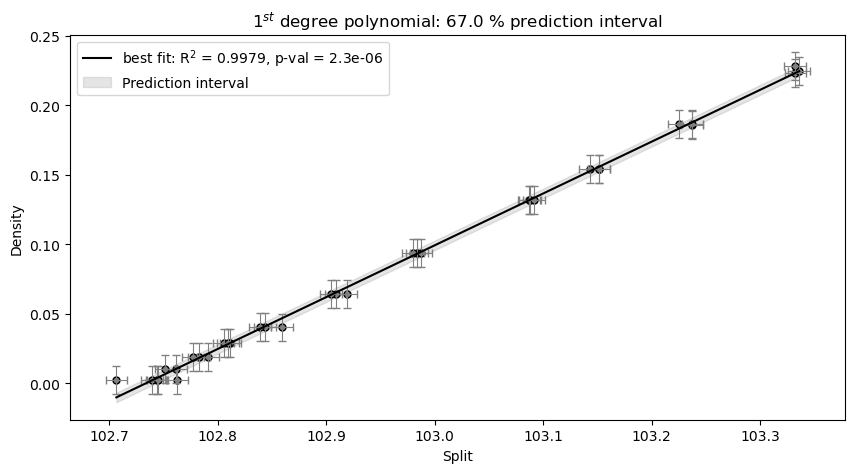

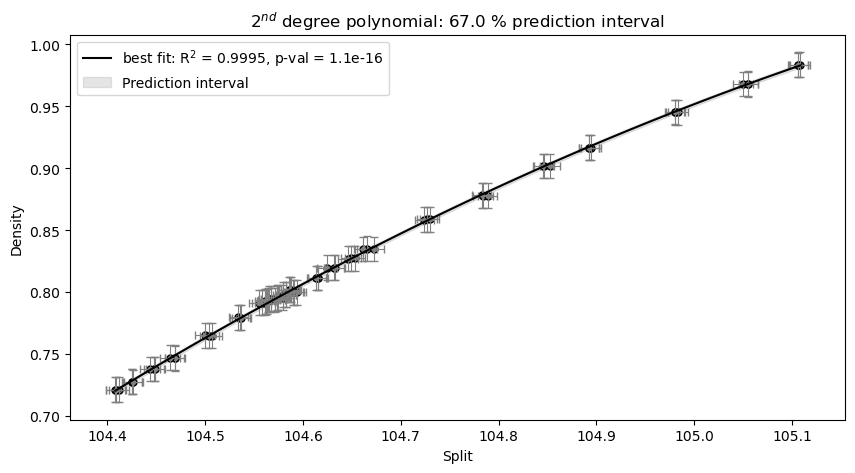

In [5]:
CI=0.67
df=T37C
eq_division='cmass_24C'
save_suffix='_CMASS_24C'

pf.plot_and_save_CO2cali_pickle(cali_data=df, Split_col=Split_col, CO2_dens_col=CO2_dens_col, split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='Low',N_poly=1, CI=CI, std_error=True,save_fig=True,eq_division=eq_division,save_suffix=save_suffix)
pf.plot_and_save_CO2cali_pickle(cali_data=df, Split_col=Split_col, CO2_dens_col=CO2_dens_col, split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='High',N_poly=2, CI=CI, std_error=True,save_fig=True,eq_division=eq_division,save_suffix=save_suffix)


## This creates pickles using cali data from both april and august 2021 
- NOTE that this was not included previously to 10/17/2023, meaning the equations used prior to this date were considering only april data

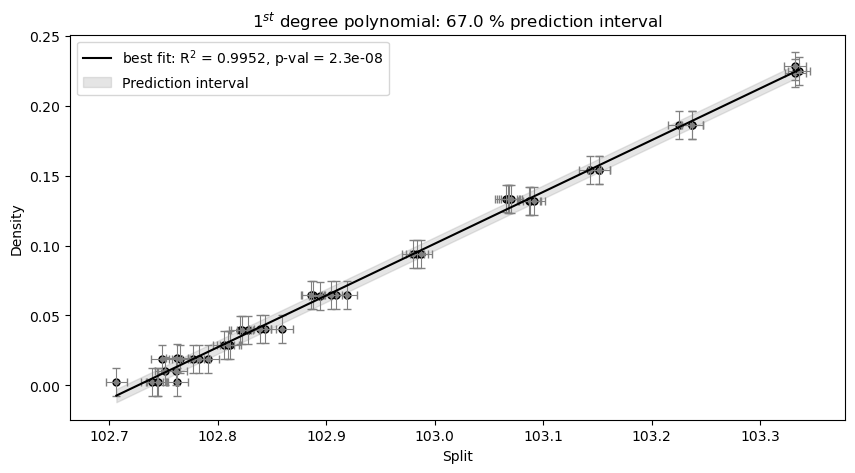

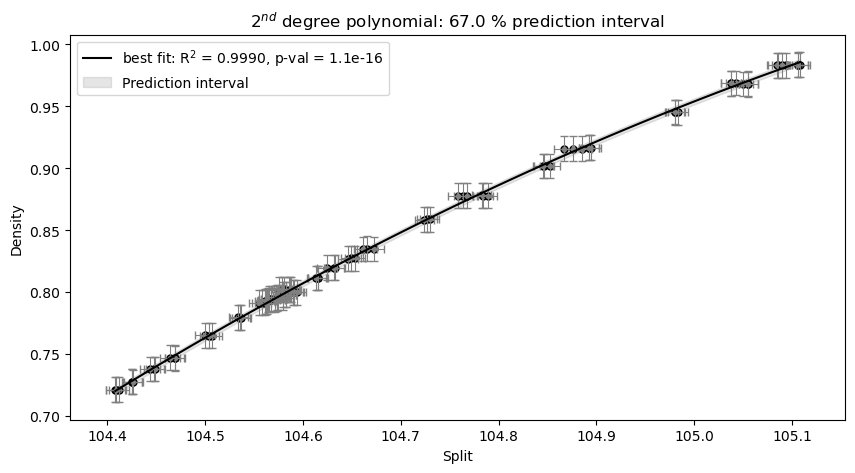

In [8]:
CI=0.67
df=T37C_withaug
eq_division='cmass_24C'
save_suffix='_CMASS_24C'
pf.plot_and_save_CO2cali_pickle(cali_data=df, Split_col=Split_col, CO2_dens_col=CO2_dens_col, split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='Low',N_poly=1, CI=CI, std_error=True,save_fig=True,eq_division=eq_division,save_suffix=save_suffix)
pf.plot_and_save_CO2cali_pickle(cali_data=df, Split_col=Split_col, CO2_dens_col=CO2_dens_col, split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='High',N_poly=2, CI=CI, std_error=True,save_fig=True,eq_division=eq_division,save_suffix=save_suffix)
